# K-Nearest Neighbor(KNN)
* 개념 소개
    * 새로운 데이터가 들어왔을 때, 기존 데이터와 비교하여 가장 가까운 K개의 이웃의 정보를 기반으로 새로운 데이터를 예측하는 알고리즘이다.
    * 가까운 이웃 중에 임의의 K개를 선택한다. 이웃 7개를 선택할 경우, 노란색이 2개, 초록색이
    3개, 파란색이 2개가 있다. 이 중 초록색이 제일 많으므로 새로운 데이터의 클래스를
    초록색으로 예측한다.
    * K가 작을 경우 데이터의 지역적 특성을 지나치게 반영하여 과적합이 발생한다. 반대로 K가 너무 클 경우 모델이 지나치게 정규화되어 과소적합이 발생할 수 있다.
    * 적절한 K를 선택하기 위해서는 트레인셋과 테스트셋을 나누고, K를 바꿔가면서 실험을 거쳐 최적의 K를 찾아야 한다.

* 거리 측정 방법
    * KNN에서 거리 측정 방법은 또 하나의 하이퍼 파라미터 거리를 측정하는 방법애 따라 결과가 크게 달라진다.

    * 거리 측정 방법
        * Euclidean Distance
        * Manhatan Distance
    
    * Euclidean Distance(유클리디안 거리)
        * 일반적으로 가장 많이 사용되는 거리 측정 방법으로 두 데이터 사이의 직선 최단거리를 구한다.
        * A 지점에서 B 지점까지 직선을 그으면 최단거리를 구할 수 있다.
    * Manhatan Distance(맨해튼 거리)
        * A에서 B까지 각 좌표축 방향으로만 이동해서 거리를 구하는 방법이다.
        * 맨해튼 거리는 두 점 좌표간의 절대값 차이를 합해서 구한다.

* 데이터 스케일링
    * KNN 알고리즘으로 학습하기 전에는 변수의 범위(Scale)을 축소해야 한다. 변수마다 측정 범위가 다를 경우에 범위가 큰   변수가 모델에 과도하게 큰 영향을 미치고, 범위가 작은 변수는 무시될 수 있기 때문이다.
    * 데이터의 값 범위를 변환하는 것을 스케일링이라고 하며 자주 사용되는 스케일링 방법은 다음과 같다.
        * ```MinMaxScaler``` - 모든 변수의 값을 0에서 1 사이로 조정한다.
        * ```StandardScaler``` - 평균을 0, 표준편차를 1로 변수를 조정한다.

### KNN 모델의 특징
* KNN의 특징은 학습이 따로 필요 없다는 것이다.
* 새로운 데이터가 주어지면 그때 기존 데이터에서 가까운 이웃을 뽑고 예측한다.
* 장점
    * 데이터가 복잡하고 이해하기 힘들더라도 클래스 간 비슷한 경향을 보이면 결과가 좋다.
    * 노이즈 데이터의 영향을 크게 받지 않는다.(Robust)
    * 비모수적 방법이기 때문에 데이터가 어떤 분포여도 상관 없이 적용할 수 있다.
    * 분류 뿐만 아니라 회귀 문제에도 KNN 방법론을 적용할 수 있다.

* 단점
    * 새로운 데이터와 모든 관측치의 거리를 측정하므로, 데이터의 양이 많아질수록 거리를 측정한느 시간이 길어 진다.
    * 어떤 분석에 어떤 K가 적절한지 알 수 없으므로 최적의 K를 선택하기 어렵다.


In [1]:
# Scikit-learn으로 실습
# iris 데이터

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd
dataset = load_iris()
data = pd.DataFrame(dataset.data, columns=dataset.feature_names)
x_train,x_test,y_train,y_test = train_test_split(data, dataset.target, random_state=42)

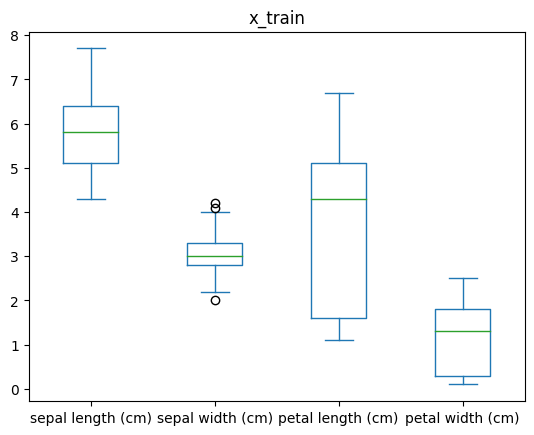

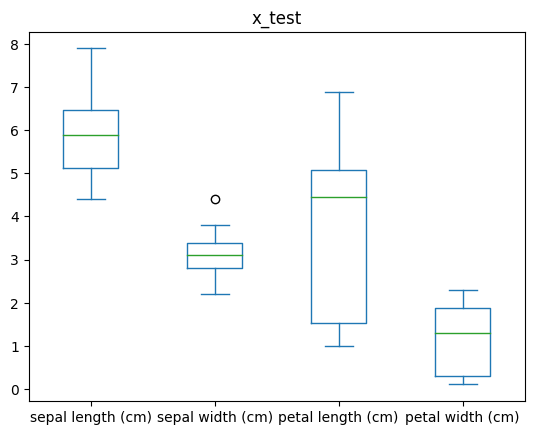

In [2]:
# pandas의 시각화 기능으로 박스 플롯을 그려 스케일 확인
import matplotlib.pyplot as plt
x_train.plot(kind='box')
plt.title('x_train')
plt.show()

x_test.plot(kind='box')
plt.title('x_test')
plt.show()

In [4]:
# 학습데이터 전처리
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
x_train_scaled = mms.fit_transform(x_train)
x_test_scaled = mms.fit_transform(x_test)

print('x_train_scaled: ',x_train_scaled)
print('x_test_scaled: ', x_test_scaled)

x_train_scaled:  [[0.20588235 0.72727273 0.05357143 0.04166667]
 [0.26470588 0.95454545 0.07142857 0.        ]
 [0.44117647 0.31818182 0.71428571 0.75      ]
 [0.5        0.63636364 0.60714286 0.625     ]
 [0.70588235 0.5        0.64285714 0.58333333]
 [0.32352941 0.86363636 0.03571429 0.125     ]
 [0.32352941 0.77272727 0.07142857 0.04166667]
 [0.35294118 0.18181818 0.46428571 0.375     ]
 [0.58823529 0.36363636 0.71428571 0.58333333]
 [0.61764706 0.5        0.78571429 0.70833333]
 [0.67647059 0.45454545 0.58928571 0.54166667]
 [0.85294118 0.72727273 0.89285714 1.        ]
 [0.41176471 0.40909091 0.55357143 0.5       ]
 [0.97058824 0.45454545 0.98214286 0.83333333]
 [0.38235294 0.45454545 0.60714286 0.58333333]
 [0.23529412 0.68181818 0.05357143 0.04166667]
 [1.         0.36363636 1.         0.79166667]
 [0.44117647 0.31818182 0.53571429 0.375     ]
 [0.26470588 0.63636364 0.05357143 0.04166667]
 [0.20588235 0.68181818 0.03571429 0.08333333]
 [0.23529412 0.81818182 0.14285714 0.125   

In [6]:
# 모델 생성 및 학습
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train_scaled, y_train)

#모델 예측 및 평가
from sklearn.metrics import accuracy_score
pred = model.predict(x_test_scaled)
accuracy_score(y_test, pred)

0.9736842105263158

### KNeighborsClassifier 파라메터
* n_neighbors: 분류 시 고려할 인접 샘플 수 (가장 가까운 이웃을 몇개를 고를지에 대한 파라미터) default=5
* weights: 'distance'-인접한 샘플의 거리에 따라 다른 가중치 부여(가까울수록 큰 가중치) default='uniform'
* metric : 거리계산의 척도(minkowski, euclidean, manhantan 등), default='minkowski' , 'p'라는 매개 변수를 추가사용
* n_jobs : 사용할 코어의 갯수, -1이면 전부 사용